In [162]:
from PIL import Image
import matplotlib.pyplot as plt

In [163]:
# initialising constants
photos_directory = "../resources/photos_to_brandify"
LOGO_PATH = "../resources/NuIEEE_logos"
BRANDED_PHOTOS_DIRECTORY = "../brandified_photos"

In [164]:
# getting the files
import os
total_files = len(os.listdir(photos_directory))
completed_files = 0
filename_array = list(filter(lambda filename: filename.endswith(".jpg") 
                            or filename.endswith(".png") 
                            or filename.endswith(".JPG"), 
                        os.listdir(photos_directory)))
total_i = len(filename_array)
print(filename_array)

['IMG_0006.jpg', 'IMG_8615.jpg', 'IMG_8734.JPG']


In [165]:
# selecting image
example_photo_filename = filename_array[1]
print(example_photo_filename)

IMG_8615.jpg


In [166]:
# define logo dimensions
logo_path_blue = LOGO_PATH + "/" + "NuIEEE_logo_blue.png"
logo_template = Image.open(logo_path_blue)
logo_template = logo_template.convert("RGBA")
logo_width = int(1.5 * logo_template.size[0])
logo_height = int((logo_width / logo_template.size[0]) * logo_template.size[1])
logo_displacement_x = int(logo_width/2)
logo_displacement_y = int(logo_height*3/4)
logo_template = logo_template.resize((logo_width, logo_height), Image.LANCZOS)

In [167]:
# getting the photo
photo_path = photos_directory + "/" + example_photo_filename
photo = Image.open(photo_path)
photo = photo.convert("RGBA")

In [168]:
# position constants

# upper-left corner
x_ul = int(logo_displacement_x - logo_width/8)
y_ul = int(logo_displacement_y)

# upper-right corner
x_ur = int(photo.width - logo_width - logo_displacement_x)
y_ur = int(logo_displacement_y)

# bottom-center alignment
x_bc = int(photo.width/2 - logo_width/2 - logo_displacement_x/4)
y_bc = int(photo.height - logo_height - logo_displacement_y)

In [169]:
def test_position(photo, x, y):
    region = photo.crop((x, y, x + logo_width, y + logo_height))
    region = region.convert("RGB")
    region_data = region.getdata()
    #plt.imshow(region)
    #plt.axis('off')
    #plt.show()

    brightness_sum = 0
    pixel_count = 0

    for pixel in region_data:
        r, g, b = pixel[:3]
        brightness = (r + g + b) / 3
        brightness_sum += brightness
        pixel_count += 1
        average_brightness = brightness_sum / pixel_count

    white_score = int((255*100)/(1 + average_brightness))
    black_score = int((average_brightness*5/255) * 100)

    return {
        "white": white_score,
        "black": black_score
    } 

In [170]:
def best_position_logo(photo):
    position_array = []
    # upper-left corner
    position_array.append(test_position(photo, x_ul, y_ul))
    # upper-right corner
    position_array.append(test_position(photo, x_ur, y_ur))
    # bottom-center alignment
    position_array.append(test_position(photo, x_bc, y_bc))
    
    print(position_array)
    best = 0
    for index, position in enumerate(position_array):
        for color, value in position.items():
            if value > best:
                best = value
                best_index = index
                best_color = color

    if best_index == 0:
        position = (x_ul, y_ul)
    elif best_index == 1:
        position = (x_ur, y_ur)
    elif best_index == 2:
        position = (x_bc, y_bc)

    return {
        'position': position,
        'color': best_color
    }

In [171]:
# get resized logo with given the color
def get_logo(logo_color):
    logo = Image.open(LOGO_PATH + "/" + f'NuIEEE_logo_{logo_color}.png')
    logo = logo.convert("RGBA")
    logo = logo.resize((logo_width, logo_height), Image.LANCZOS)
    return logo

In [172]:
# paste the logo in the right position in the photo
best_position = best_position_logo(photo)
position = best_position['position']
logo_color = best_position['color']

logo = get_logo(logo_color)
image_with_logo = Image.new("RGBA", photo.size)
image_with_logo.paste(photo, (0, 0))
image_with_logo.paste(logo, position, mask=logo.split()[3])

#plt.imshow(image_with_logo)
#plt.axis('off')
#plt.show()

[{'white': 102, 'black': 488}, {'white': 336, 'black': 146}, {'white': 259, 'black': 190}]


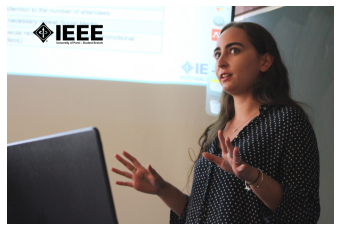

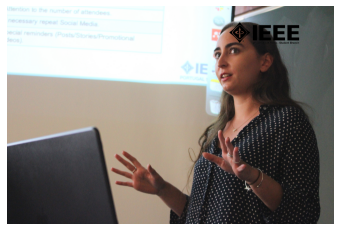

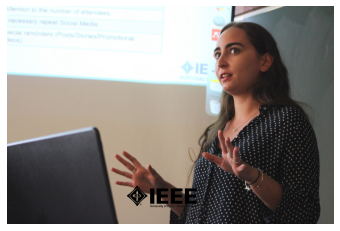

In [174]:
# more tests
positions = [
    (x_ul, y_ul),
    (x_ur, y_ur),
    (x_bc, y_bc)
]
logo_color = "black"

for pos in positions:
    logo = get_logo(logo_color)
    image_with_logo = Image.new("RGBA", photo.size)
    image_with_logo.paste(photo, (0, 0))
    image_with_logo.paste(logo, pos, mask=logo.split()[3])
    plt.imshow(image_with_logo)
    plt.axis('off')
    plt.show()
